In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')
from src import sp_eda, sp_visualizacion as vis

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [95]:
df= pd.read_csv('../data_processed/ba_limpieza.csv', parse_dates=['Date'])
df.head(3)

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,...,Nr.Employed,Y,Date,Latitude,Longitude,Id_,Year,Month,Day_Name,Quarter
0,NaN,housemaid,married,basic.4y,no,no,no,telephone,261,1,...,5191.0,no,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,2019.0,august,friday,3.0
1,57.0,services,married,high.school,unknown,no,no,telephone,149,1,...,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,2016.0,september,wednesday,3.0
2,37.0,services,married,high.school,no,yes,no,telephone,226,1,...,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2019.0,february,friday,1.0


In [96]:
df.select_dtypes(include=np.number).columns

Index(['Age', 'Duration', 'Campaign', 'Pdays', 'Previous', 'Emp.Var.Rate',
       'Cons.Price.Idx', 'Cons.Conf.Idx', 'Euribor3M', 'Nr.Employed',
       'Latitude', 'Longitude', 'Year', 'Quarter'],
      dtype='object')

In [97]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,37880.0,39.977112,17.0,32.0,38.0,47.0,98.0,10.437957
Duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
Campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
Pdays,43000.0,962.330953,0.0,999.0,999.0,999.0,999.0,187.260394
Previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
Emp.Var.Rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
Cons.Price.Idx,42529.0,93.574219,92.201,93.075,93.749,93.994,94.767,0.579548
Cons.Conf.Idx,43000.0,-40.509049,-50.8,-42.7,-41.8,-36.4,-26.9,4.637186
Euribor3M,33744.0,3.616521,0.634,1.344,4.857,4.961,5.045,1.737117
Nr.Employed,43000.0,5166.852602,4963.6,5099.1,5191.0,5228.1,5228.1,72.411125


In [98]:
columnas_num = df.select_dtypes(include=np.number).columns.tolist()
lista_eliminar = ['Pdays','Previous', 'Latitude', 'Longitude','Year', 'Quarter']
for col in lista_eliminar:
     columnas_num.remove(col)

In [79]:
df[columnas_num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,37880.0,39.977112,10.437957,17.000,32.000,38.000,47.000,98.000
Duration,43000.0,257.739279,258.666033,0.000,102.000,179.000,319.000,4918.000
Campaign,43000.0,2.567233,2.772294,1.000,1.000,2.000,3.000,56.000
Emp.Var.Rate,43000.0,0.077128,1.573898,-3.400,-1.800,1.100,1.400,1.400
Cons.Price.Idx,42529.0,93.574219,0.579548,92.201,93.075,93.749,93.994,94.767
Cons.Conf.Idx,43000.0,-40.509049,4.637186,-50.800,-42.700,-41.800,-36.400,-26.900
Euribor3M,33744.0,3.616521,1.737117,0.634,1.344,4.857,4.961,5.045
Nr.Employed,43000.0,5166.852602,72.411125,4963.600,5099.100,5191.000,5228.100,5228.100


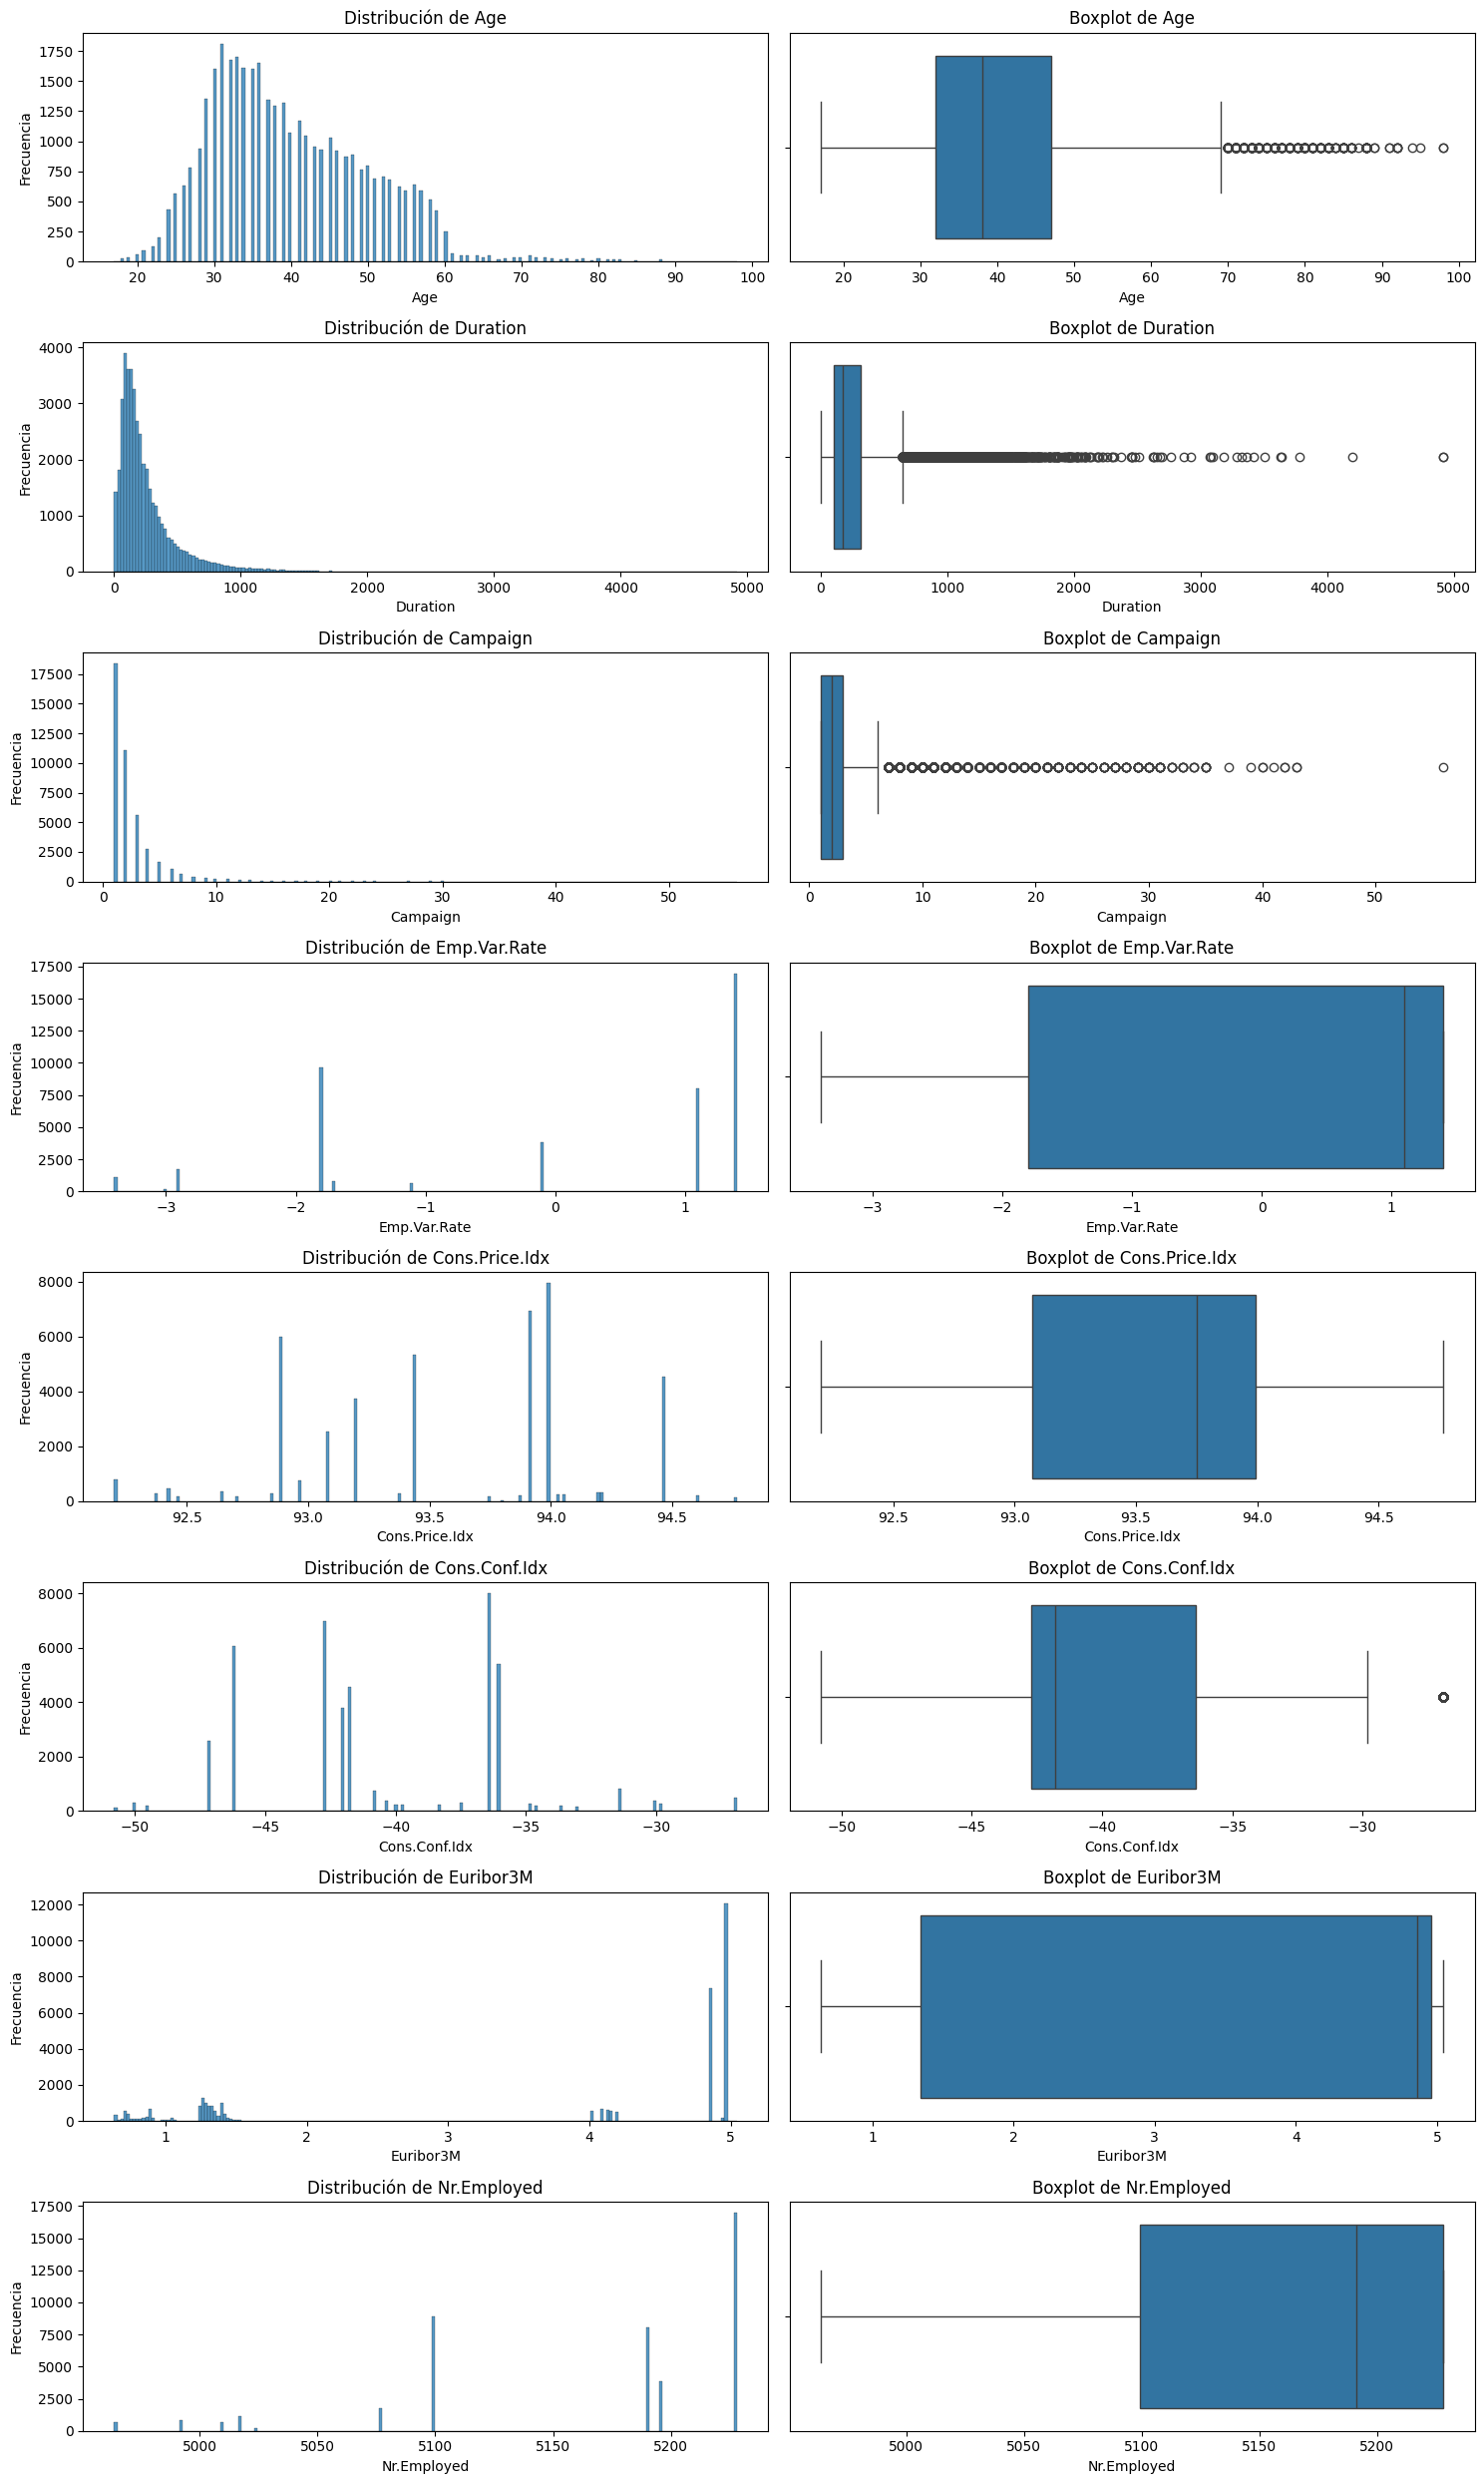

In [99]:
vis.subplot_col_num(df,columnas_num) 

In [100]:
# Verifico el número de outliers que hay en cada caso

dicc_outliers= {'Age': 69,
                'Duration': 800,
                'Campaign': 7,
                'Cons.Conf.Idx': -27}

for col, out in dicc_outliers.items():
    outliers=df[col][df[col]>out].count()
    print(f'Para la columna {col.upper()} tenemos {outliers} outliers, lo que representa un {round(outliers/df.shape[0]*100,3)}% de los datos')


Para la columna AGE tenemos 441 outliers, lo que representa un 1.026% de los datos
Para la columna DURATION tenemos 1827 outliers, lo que representa un 4.249% de los datos
Para la columna CAMPAIGN tenemos 1846 outliers, lo que representa un 4.293% de los datos
Para la columna CONS.CONF.IDX tenemos 477 outliers, lo que representa un 1.109% de los datos


In [101]:
# Elimino los outliers que no son representativos y los cambio por nulos

df['Age']=df['Age'].apply(lambda x: np.nan if x>69 else x)
df['Cons.Conf.Idx']=df['Cons.Conf.Idx'].apply(lambda x: np.nan if x>-27 else x)

In [102]:
# Gestión de nulos de la columnas numéricas

high_umbral, low_umbral= sp_eda.calcular_solo_col_nul(df, umbral=5) 

,Column,Datatype,NullCount,Null%
0,Age,float64,5561,12.932558
1,Cons.Price.Idx,float64,471,1.095349
2,Cons.Conf.Idx,float64,477,1.109302
3,Euribor3M,float64,9256,21.525581
4,Date,datetime64[ns],248,0.576744
5,Year,float64,248,0.576744
6,Quarter,float64,248,0.576744


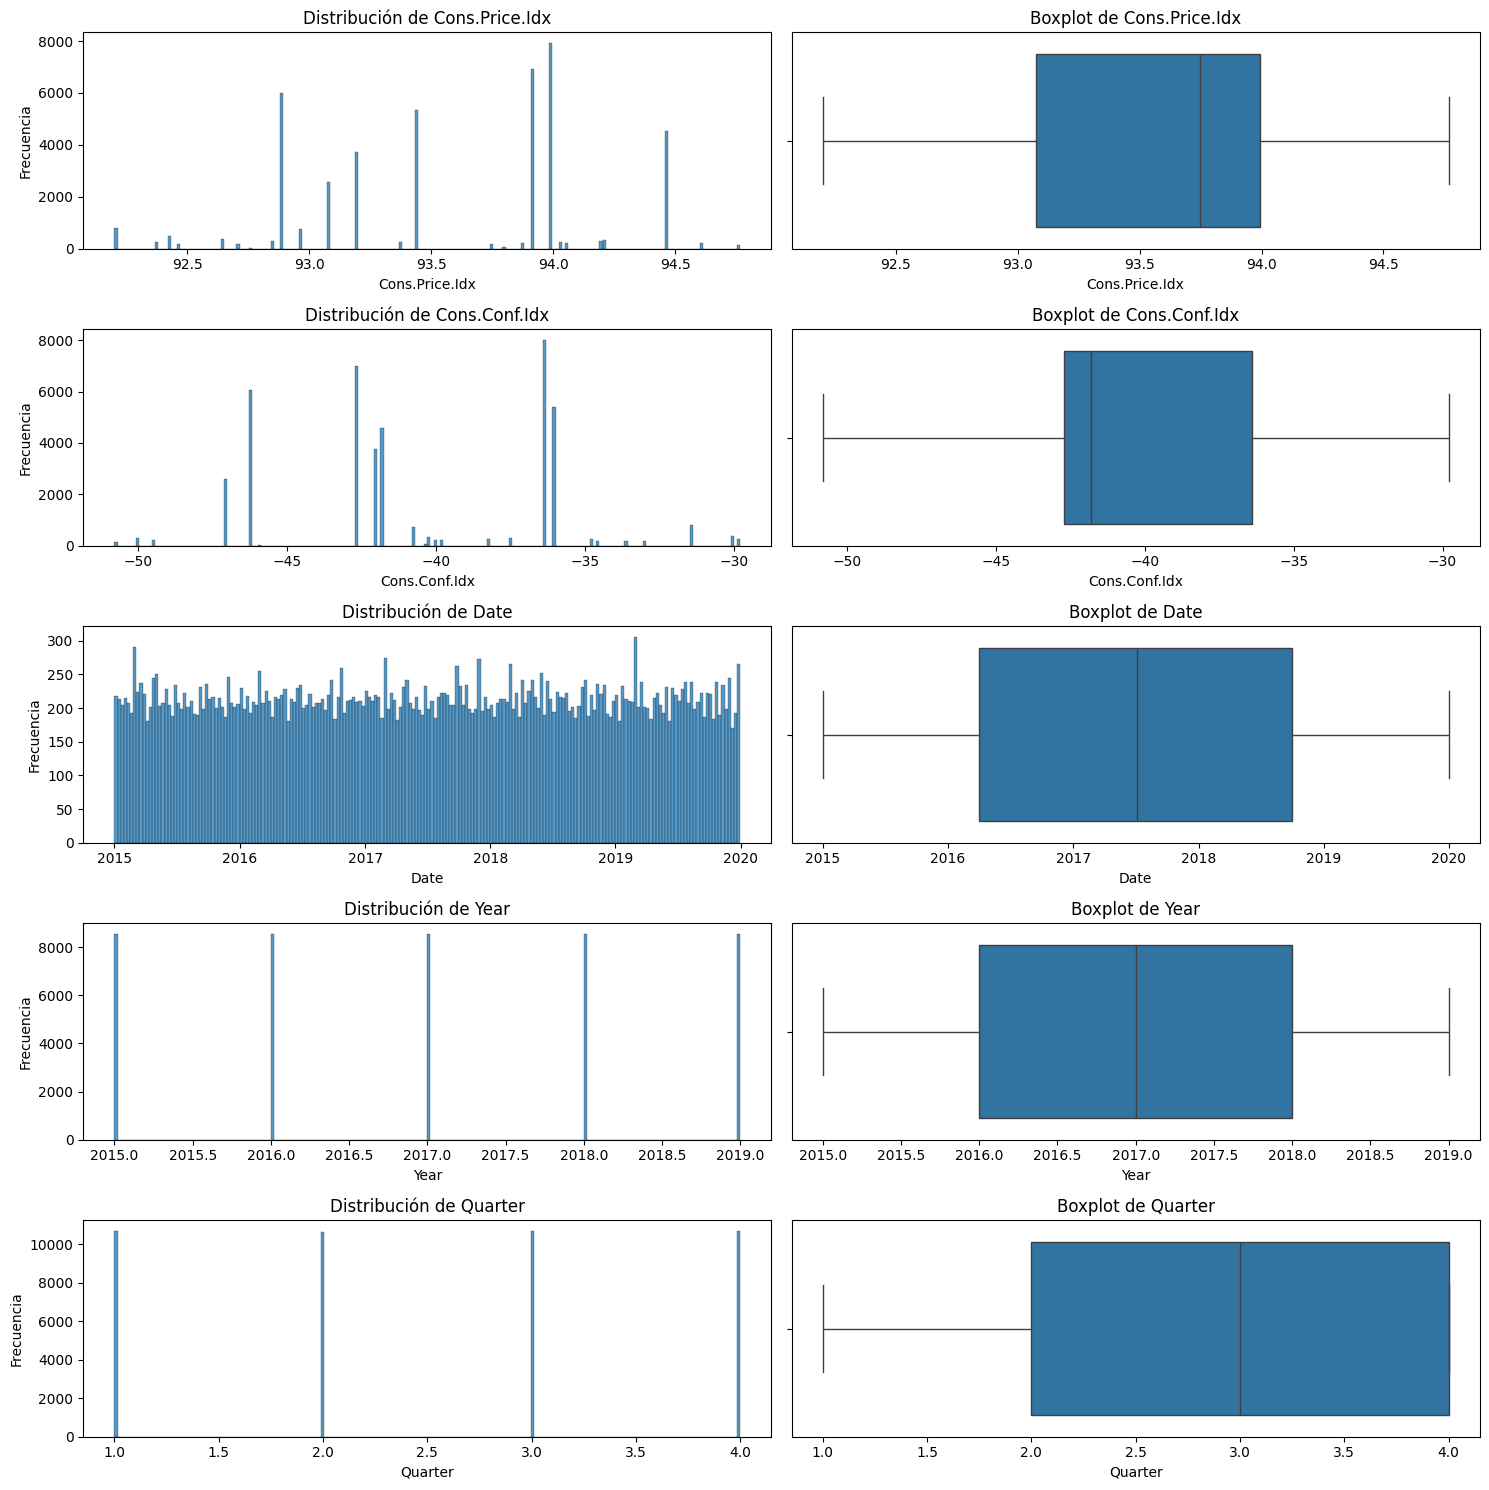

In [103]:
vis.subplot_col_num(df,low_umbral)

In [104]:
# Las columnas con un % de nulos inferior al umbral se imputarán con el método fillna()

df=df.fillna({
    'Cons.Price.Idx': df['Cons.Price.Idx'].mean(),
    'Cons.Conf.Idx': df['Cons.Conf.Idx'].mean(),
    'Date': df['Date'].mean(),
    'Year': 2017,
    'Quarter': 3 
})

df[low_umbral].describe().T

,count,mean,min,25%,50%,75%,max,std
Cons.Price.Idx,43000.0,93.574219,92.201,93.075,93.574219,93.994,94.767,0.576365
Cons.Conf.Idx,43000.0,-40.661708,-50.8,-42.7,-41.8,-36.4,-29.8,4.407482
Date,43000,2017-07-01 19:55:11.676646656,2015-01-01 00:00:00,2016-04-04 00:00:00,2017-07-01 19:55:11.676646656,2018-09-30 00:00:00,2019-12-31 00:00:00,NaN
Year,43000.0,2017.001302,2015.0,2016.0,2017.0,2018.0,2019.0,1.410228
Quarter,43000.0,2.504209,1.0,2.0,3.0,3.0,4.0,1.115895


In [12]:
# Las columnas con un % de nulos superior al umbral se imputarán con el método iterativeimputer

In [105]:
df, col_iterative = sp_eda.imputar_iterative(df, high_umbral)

,count,mean,std,min,25%,50%,75%,max
Age_iterative,43000.0,39.524027,9.030897,17.000,33.000,39.000,45.000,69.000
Euribor3M_iterative,43000.0,3.616138,1.540617,0.634,1.466,4.076,4.959,5.045


In [106]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,37439.0,39.541227,17.0,32.0,38.0,47.0,69.0,9.670787
Duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
Campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
Pdays,43000.0,962.330953,0.0,999.0,999.0,999.0,999.0,187.260394
Previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
Emp.Var.Rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
Cons.Price.Idx,43000.0,93.574219,92.201,93.075,93.574219,93.994,94.767,0.576365
Cons.Conf.Idx,43000.0,-40.661708,-50.8,-42.7,-41.8,-36.4,-29.8,4.407482
Euribor3M,33744.0,3.616521,0.634,1.344,4.857,4.961,5.045,1.737117
Nr.Employed,43000.0,5166.852602,4963.6,5099.1,5191.0,5228.1,5228.1,72.411125


In [107]:
# después de comprobar los estadísticos eliminamos las columnas con nulos
df.drop(columns=high_umbral, inplace=True)

In [109]:
# guardo el archivo sobre el mismo que hemos estado utilizando
df.to_csv('../data_processed/ba_limpieza.csv', index=False)